## `PROJECT GUIDELINES`

### `Objective`
> We have a following database with multiple tables connected to one another via various fileds.
Objective is to extract the insights from the available data and provide recommendations that helps the 'Chinook Music Store' to establish a marketing strategy and increase their revenue.

### `Working Approach`
> In order to achieve that, we have used expert level SQL techniques to dig into the provided data and extract meaningful insights with recommendations based on statistics and logic. We have also used Matplotlib plots and charts for easier data visualization and understanding.

### `Skills and Techniques Used`
> SQL, Python, Pandas, Numpy, Matplotlib, Seaborn, Bar Chart, Pie Chart, Data Analytics, Data Visualization

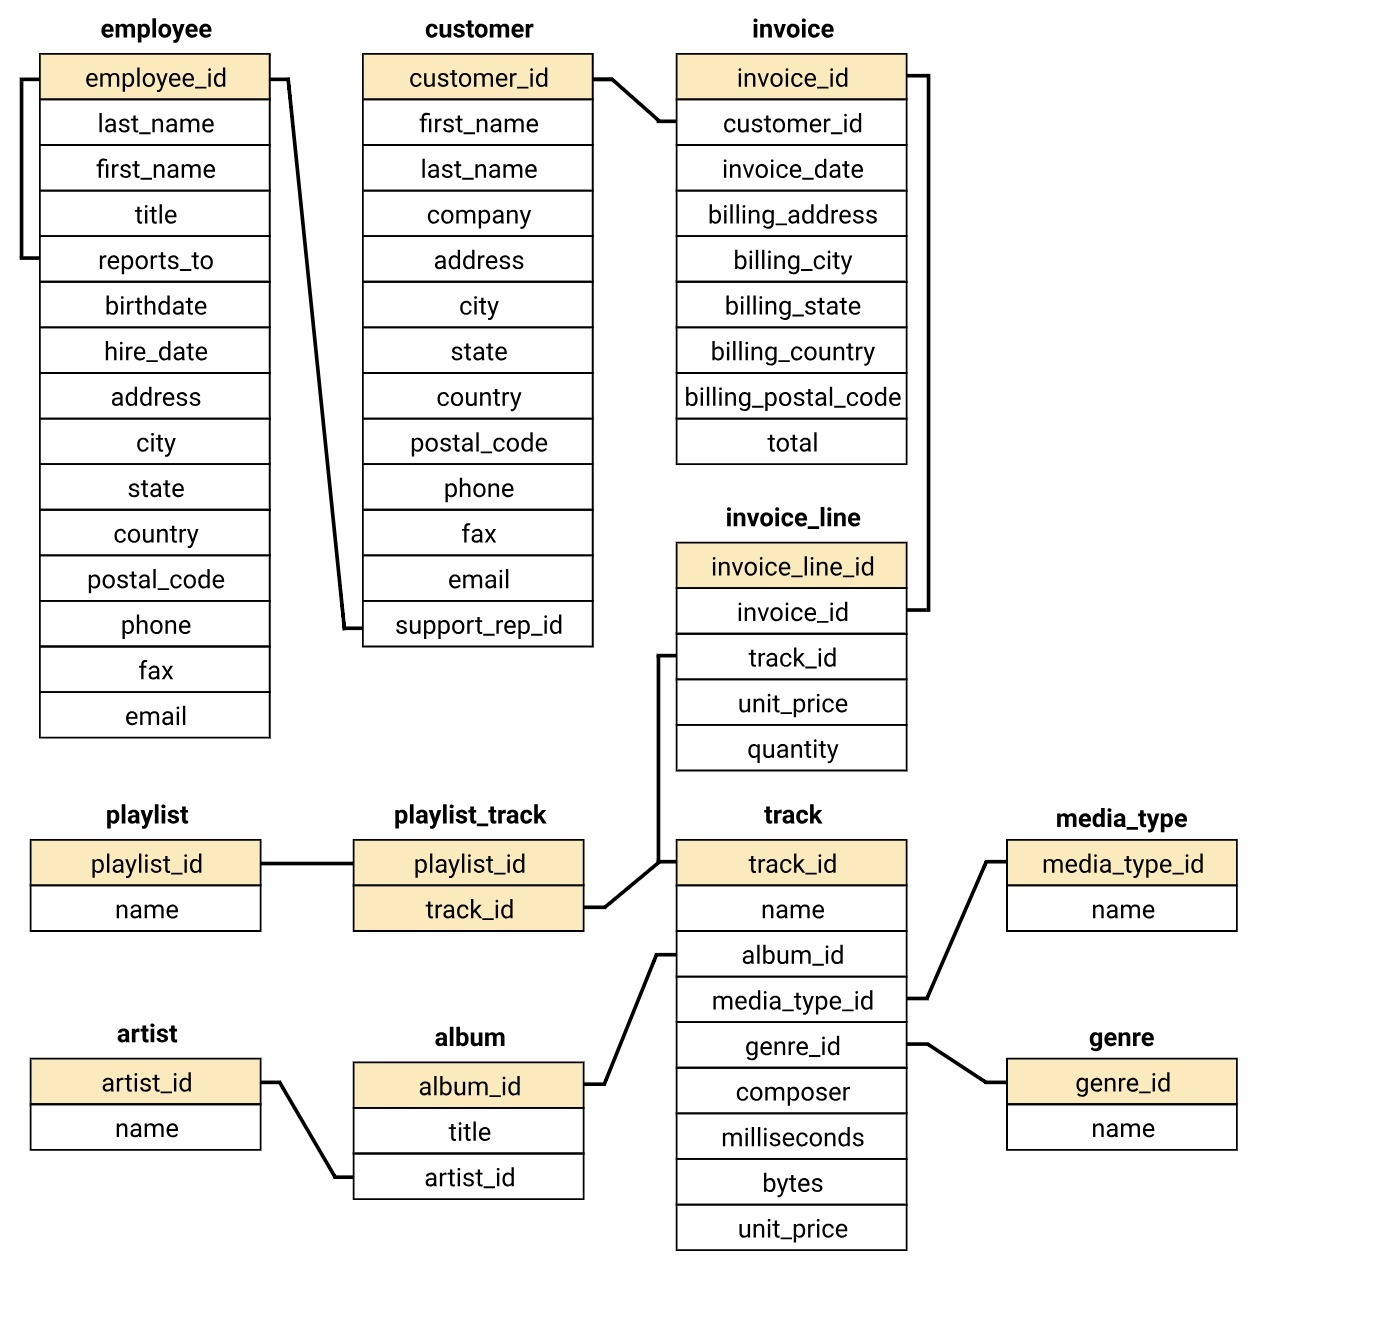

In [1]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Database
database="chinook.db"

def run_query(q):
    with sql.connect(database) as conn:
        return pd.read_sql_query(q,conn)

### `1. GENRE ANALYSIS FOR ALBUM SELECTION`
> Identifying Top-Selling Genre in the USA

In [3]:
q = """
    WITH usa_tracks AS
    (
    SELECT g.name Genre_Name, count(inv.billing_country) Num_of_Purchases,
    (SELECT count(il.quantity)
    FROM invoice_line il
    INNER JOIN invoice inv ON il.invoice_id = inv.invoice_id
    WHERE inv.billing_country = "USA") Total_Sold
    FROM genre g
    INNER JOIN track t ON g.genre_id = t.genre_id
    INNER JOIN invoice_line il ON t.track_id = il.track_id
    INNER JOIN invoice inv ON il.invoice_id = inv.invoice_id
    WHERE inv.billing_country = "USA"
    GROUP BY 1
    ORDER BY 2 desc
    )
    
    SELECT Genre_Name, Num_of_Purchases,
    ROUND(CAST(Num_of_Purchases AS float)/Total_Sold*100,2) Percentage_Sold
    FROM usa_tracks
    """

df = run_query(q)
df

,Genre_Name,Num_of_Purchases,Percentage_Sold
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Pop,22,2.09
7,Latin,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


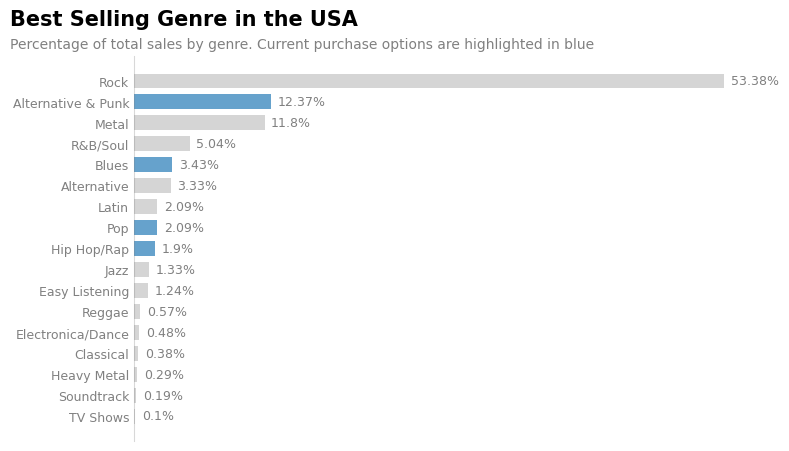

In [4]:
# Creating Bar Chart

# Sorting the DataFrame by Percentage_Sold
df = df.sort_values(by='Percentage_Sold')

# Creating a color map to identify key albums of interest
album_options = ['Alternative & Punk','Hip Hop/Rap','Blues','Pop']
cmap = df['Genre_Name'].apply(lambda x: '#0064AB' if x in album_options else '#BABABA')

# Creating the bar plot
fig,ax = plt.subplots(figsize=(8,5))
bars = ax.barh(df['Genre_Name'],df['Percentage_Sold'],color=cmap,height=0.7, alpha=0.6)

# Adding text and adjusting width bars
for bar, percentage in zip(bars, df['Percentage_Sold']):
    ax.text(bar.get_width()+0.6,bar.get_y() + bar.get_height()/2, f'{percentage}%',\
            va='center', ha='left', fontsize=9, color='grey')
    
# Customizing axes and layout
ax.set_yticklabels(df['Genre_Name'],fontsize=9,color='grey')
ax.set_xticks([])
plt.text(-0.2,1.08,'Best Selling Genre in the USA',\
         fontsize=15,weight='bold',color='black',transform=plt.gca().transAxes)
plt.text(-0.2,1.02,'Percentage of total sales by genre. Current purchase options are highlighted in blue',\
         fontsize=10,color='grey',transform=plt.gca().transAxes)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting left spine opacity
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(0.3)

# Removing y-axis tick parameters
ax.tick_params(axis='y',which='both',length=0)

plt.show()

### `2. EMPLOYEE SALES PERFORMANCE ANALYSIS`

> Identifying Best Selling Employees

In [5]:
q = """
    WITH employee_data AS
    (
    SELECT e.first_name || " " || e.last_name name, e.hire_date hire_date,
    --count(c.customer_id) num_of_customers,
    count(inv.invoice_id) num_of_invoices, cast(round(sum(inv.total),0) as INT) total_sales
    FROM employee e
    INNER JOIN customer c ON e.employee_id = c.support_rep_id
    INNER JOIN invoice inv ON c.customer_id = inv.customer_id
    GROUP BY 1
    ORDER BY 3
    )
    
    SELECT *,
    round(cast(ed.total_sales AS float)/ed.num_of_invoices,2) avg_per_invoice
    FROM employee_data ed
    ORDER BY 4 desc
    """

df2 = run_query(q)
df2

,name,hire_date,num_of_invoices,total_sales,avg_per_invoice
0,Jane Peacock,2017-04-01 00:00:00,212,1732,8.17
1,Margaret Park,2017-05-03 00:00:00,214,1584,7.40
2,Steve Johnson,2017-10-17 00:00:00,188,1394,7.41


In [6]:
df2['hire_date'] = pd.to_datetime(df2['hire_date'])
df2 = df2.sort_values('total_sales',ascending=False)

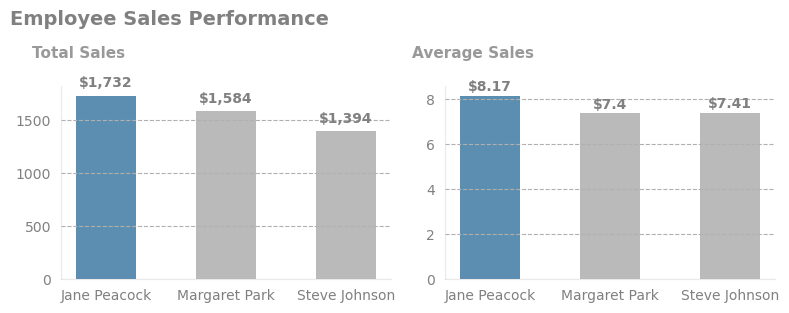

In [7]:
# Data
sales_rep_name = df2['name'].values
total_sales = df2['total_sales'].values
sales_per_customer = df2['avg_per_invoice'].values

# Create subplots
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))

# Total sales chart
axes[0].bar(sales_rep_name,total_sales,color='#bababa',width=0.5)
axes[0].bar(sales_rep_name[0],total_sales[0],\
            color='#0064ab',width=0.5,alpha=0.5)

# Total sales annotations
for sales,index in zip(total_sales,range(3)):
    axes[0].text(x=index,y=sales+80,s='${:,}'.format(sales),\
                 fontweight='bold',ha='center',color='grey',size=10)

# Total Sales chart label
axes[0].text(-1.25,1.15,'Total Sales',weight='bold',fontsize=11,\
             alpha=0.4,transform=plt.gca().transAxes)

# Main chart title
axes[0].text(x = -0.8, y= 2400, s= 'Employee Sales Performance',\
             color= 'grey', weight='bold', fontsize= 14, ha='left')

# Average Sales Chart
axes[1].bar(sales_rep_name,sales_per_customer,color='#bababa',width=0.5)
axes[1].bar(sales_rep_name[0],sales_per_customer[0],\
            color='#0064ab',width=0.5,alpha=0.5)

# Average Sales annotations
for sales,index in zip(sales_per_customer,range(3)):
    axes[1].text(x=index,y=sales+0.2,s='${}'.format(sales),\
                 weight='bold',ha='center',color='grey',fontsize=10)

# Average Sales chart label
axes[1].text(-0.1,1.15,'Average Sales',weight='bold',\
             fontsize=11,alpha=0.4,transform=plt.gca().transAxes)

# Common attributes to both charts
for ax in axes:
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left','bottom']].set_color('#bababa')
    ax.spines[['left','bottom']].set_alpha(0.3)
    ax.tick_params(left=False,bottom=False, labelcolor='grey',labelsize=10)
    ax.grid(axis='y',linestyle='--')
    
plt.tight_layout(rect=[0,0.05,1,0.95])
plt.show()

### `3. SALES BY COUNTRY`

In [8]:
q = """
    -- Collate the number of customers in each country
    WITH t1 AS
    (
    SELECT country, count(c.customer_id) num_customers
    FROM customer c
    GROUP BY 1
    ),
    
    -- Collate total sales in each country
     t2 AS
    (
    SELECT c.country country, sum(inv.total) total_sales, count(inv.invoice_id) num_sales
    FROM customer c
    INNER JOIN invoice inv ON c.customer_id = inv.customer_id
    GROUP BY 1
    ),
    
    -- Group countries with only one customer as 'Others'
    t3 AS
    (
    SELECT
        CASE
            WHEN t1.num_customers = 1
            THEN 'Others'
            ELSE t1.country
        END AS countries, sum(t1.num_customers) num_customers,
        sum(t2.total_sales) total_sales, sum(t2.num_sales) num_sales
    FROM t1
    JOIN t2 ON t1.country = t2.country
    GROUP BY 1
    )
    
    -- Calculate relevant sales metrics
    SELECT countries, num_customers, total_sales, num_sales,
    round(total_sales/num_sales,2) avg_order_value,
    round(total_sales/num_customers,2) sales_per_customer, sort
    FROM (
    SELECT *, CASE WHEN countries = 'Others' THEN 1 ELSE 0 END AS sort
    FROM t3)
    ORDER BY sort, num_customers DESC;
        
    """

df3 = run_query(q)
df3

,countries,num_customers,total_sales,num_sales,avg_order_value,sales_per_customer,sort
0,USA,13,1040.49,131,7.94,80.04,0
1,Canada,8,535.59,76,7.05,66.95,0
2,Brazil,5,427.68,61,7.01,85.54,0
3,France,5,389.07,50,7.78,77.81,0
4,Germany,4,334.62,41,8.16,83.66,0
5,United Kingdom,3,245.52,28,8.77,81.84,0
6,Czech Republic,2,273.24,30,9.11,136.62,0
7,India,2,183.15,21,8.72,91.58,0
8,Portugal,2,185.13,29,6.38,92.57,0
9,Others,15,1094.94,147,7.45,73.00,1


In [9]:
# Additional Calculations

avg_cust_purchase = df3.sales_per_customer.mean()
df3['customer_pcent'] = round(df3.num_customers/df3.num_customers.sum()*100,1)
df3['sales_pcent'] = round(df3.num_sales/df3.num_sales.sum()*100,1)
df3['sale_purchase_diff'] = round((df3.sales_per_customer - avg_cust_purchase)/avg_cust_purchase*100,1)
df3

,countries,num_customers,total_sales,num_sales,avg_order_value,sales_per_customer,sort,customer_pcent,sales_pcent,sale_purchase_diff
0,USA,13,1040.49,131,7.94,80.04,0,22.0,21.3,-8.0
1,Canada,8,535.59,76,7.05,66.95,0,13.6,12.4,-23.0
2,Brazil,5,427.68,61,7.01,85.54,0,8.5,9.9,-1.6
3,France,5,389.07,50,7.78,77.81,0,8.5,8.1,-10.5
4,Germany,4,334.62,41,8.16,83.66,0,6.8,6.7,-3.8
5,United Kingdom,3,245.52,28,8.77,81.84,0,5.1,4.6,-5.9
6,Czech Republic,2,273.24,30,9.11,136.62,0,3.4,4.9,57.1
7,India,2,183.15,21,8.72,91.58,0,3.4,3.4,5.3
8,Portugal,2,185.13,29,6.38,92.57,0,3.4,4.7,6.5
9,Others,15,1094.94,147,7.45,73.00,1,25.4,23.9,-16.1


In [10]:
# Countries having Sale Purchase Difference in Positive
df3[df3['sale_purchase_diff']>0]

,countries,num_customers,total_sales,num_sales,avg_order_value,sales_per_customer,sort,customer_pcent,sales_pcent,sale_purchase_diff
6,Czech Republic,2,273.24,30,9.11,136.62,0,3.4,4.9,57.1
7,India,2,183.15,21,8.72,91.58,0,3.4,3.4,5.3
8,Portugal,2,185.13,29,6.38,92.57,0,3.4,4.7,6.5


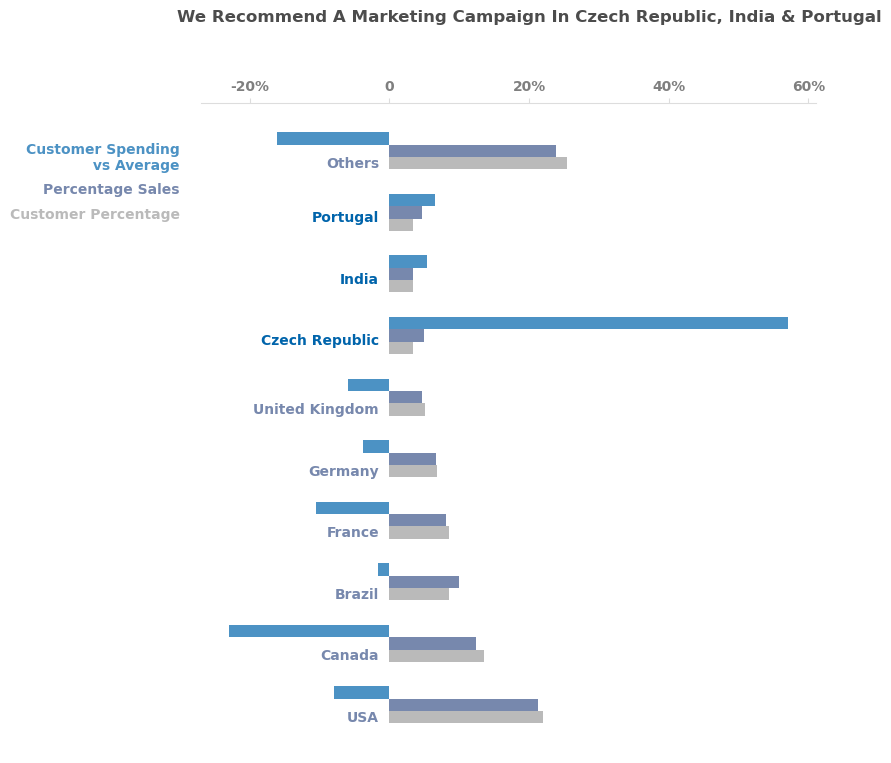

In [11]:
# Visualization
y_labs = df3.countries.values
y_axes = np.arange(df3.countries.size)

fig = plt.figure(figsize=(5,6))
plt.barh(y_axes-0.3,df3.customer_pcent,height=0.2,color='#bababa')
plt.barh(y_axes-0.1,df3.sales_pcent,height=0.2,color='#7788ad')
plt.barh(y_axes+0.1,df3['sale_purchase_diff'],\
         height=0.2,color='#0064ab',alpha=0.7)

# Assigning color where sale_purchase_diff > 0
color_map = ["","","","","","","Yes","Yes","Yes",""]

# Annotate y-axis ticks
for loc,label,color in zip(y_axes, y_labs, color_map):
    if color == "Yes":
        plt.text(x= -1.5, y=loc-0.3, s=label, ha='right',va='bottom',\
                color='#0064ab',weight='bold',size=10)
    else:
        plt.text(x= -1.5, y=loc-0.3, s=label, ha='right',va='center',\
                color='#7788ad',weight='bold',size=10)
        
for ax in fig.get_axes():
    plt.sca(ax)
    sns.despine(left=True,right=True,bottom=True,top=False) # Seaborn
    ax.tick_params(left=False,bottom=False,color='#ddd')
    ax.xaxis.set_ticks_position('top')
    ax.spines['top'].set_color('#DDD')
    ax.set_yticks([])
    plt.xticks([-20,0,20,40,60],['-20%',0,'20%','40%','60%'],\
              size=10,alpha=0.5,weight='bold')
    
# Set plot legend
plt.text(x=-30, y=8.6, s='Customer Spending\n vs Average' ,\
        color='#0064ab', alpha=0.7, weight='bold',ha='right')
plt.text(x=-30,y=8.2 , s='Percentage Sales' ,\
        color='#7788ad', weight='bold',ha='right')
plt.text(x=-30,y=7.8 , s='Customer Percentage' ,\
        color='#bababa', weight='bold', ha='right')

# Set plot title
plt.text(x=20, y=11, s='We Recommend A Marketing Campaign In Czech \
Republic, India & Portugal',weight='bold',size=12,ha='center',alpha=0.7)

plt.tight_layout(rect=[0,0,2,1.25])
plt.show()

### `4. Tracks Purchased vs. Not Purchased`

In [12]:
q = """
    WITH tracks_purchased AS
    (
    SELECT (SELECT count(t.track_id) from track t) total_tracks,
    count(distinct(il.track_id)) tracks_purchased
    FROM invoice_line il
    )
    
    SELECT *, (tp.total_tracks - tp.tracks_purchased) not_purchased,
    round(cast(tp.tracks_purchased as float)/tp.total_tracks*100,1) percent_purchased
    FROM tracks_purchased tp
    """

purchased = run_query(q)
purchased

,total_tracks,tracks_purchased,not_purchased,percent_purchased
0,3503,1806,1697,51.6


In [13]:
purchased = purchased.T
purchased

,0
total_tracks,3503.0
tracks_purchased,1806.0
not_purchased,1697.0
percent_purchased,51.6


In [14]:
purchased_list= purchased.iloc[[1,2],0]
purchased_list

tracks_purchased    1806.0
not_purchased       1697.0
Name: 0, dtype: float64

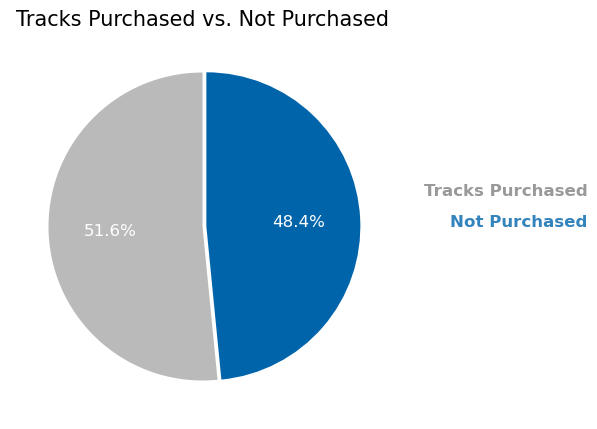

In [15]:
# Plot
plt.pie(purchased_list,
       explode=(0,0.025),
       startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize':12,'color':'white'},
        colors=('#bababa','#0064ab')
       )

# Plot Aesthetics
plt.title('Tracks Purchased vs. Not Purchased',fontsize=15,color='black')
fig = plt.gcf()
fig.set_size_inches(5,5)

# Set plot legend
plt.text(x=2.5, y=0.2, s='Tracks Purchased' ,color='gray',\
         weight='bold',fontsize=12,ha='right',alpha=0.8)
plt.text(x=2.5,y=0 , s='Not Purchased',color='#0064ab',\
         weight='bold',fontsize=12, ha='right',alpha=0.8)

plt.show()

### `5. Album Purchased vs Individual Tracks`

In [16]:
q = """
    WITH invoice_data AS
    (
    SELECT il.invoice_id, min(il.track_id) track_id
    FROM invoice_line il
    GROUP BY 1
    --WHERE invoice_id = 1
    )
    
    SELECT
    CASE
        WHEN(
        SELECT t2.track_id
        FROM track t1
        INNER JOIN track t2 ON t1.album_id=t2.album_id
        WHERE t1.track_id=id.track_id
        
        EXCEPT
        
        SELECT il.track_id
        FROM invoice_line il
        WHERE il.invoice_id=id.invoice_id)
        IS NULL
        
        AND
        (SELECT il.track_id FROM invoice_line il WHERE il.invoice_id=id.invoice_id
        EXCEPT
        SELECT t2.track_id FROM track t1 INNER JOIN track t2 ON t1.album_id=t2.album_id WHERE t1.track_id=id.track_id)
        IS NULL
        THEN "Yes"
        ELSE "No"
    END AS Album_Purchased, count(invoice_id) Count
    FROM invoice_data id
    GROUP BY 1
    ORDER BY 1 DESC
    
    """

album = run_query(q)
album

,Album_Purchased,Count
0,Yes,114
1,No,500


In [17]:
album_list = album.iloc[[0,1],1]
album_list

0    114
1    500
Name: Count, dtype: int64

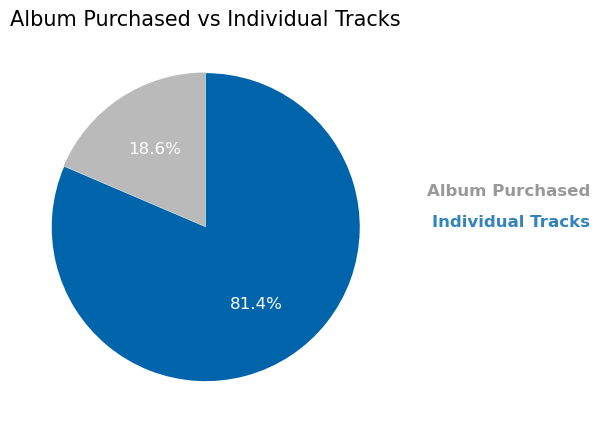

In [18]:
# Plot
plt.pie(album_list,
       explode=(0,0.005),
       startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize':12,'color':'white'},
        colors=('#bababa','#0064ab')
       )

# Plot Aesthetics
plt.title('Album Purchased vs Individual Tracks',fontsize=15,color='black')
fig = plt.gcf()
fig.set_size_inches(5,5)

# Set plot legend
plt.text(x=2.5, y=0.2, s='Album Purchased' ,color='gray',\
         weight='bold',fontsize=12,ha='right',alpha=0.8)
plt.text(x=2.5,y=0 , s='Individual Tracks',color='#0064ab',\
         weight='bold',fontsize=12, ha='right',alpha=0.8)

plt.show()

## Conclusions and Recommendations

Throughout this project, we have provided insights based on various business scenarios as well as public response and demand and have come up with following recommendations:

### Genre Selection for New Albums:
Our analysis suggests that Chinook should prioritize genre with high popularity in the USA. We recommend selecting albums from Hip-Hop, Punk and Pop genres as they show promising sales potential.

### Employee Performance:
Among the sales representative, Jane Peacock stands out as the top performer and recommended for increment in incentives.
While Steve Johnson appears to have lower total sales, it's important to note that he joined the team later and he may require additional support and training to reach his full potential.

### Sales Analysis by Country:
While the USA and Canada have the largest customer base, customers in these countries tend to spend less per transaction or purchase. On the other hand, Czech Republic, India and Portugal show higher average spending per customer.
Launching targeted marketing campaigns in these regions could attract more customers and hence increase sales.

### Track Purchasing Strategy:
Chinook's plan to focus solely on selling popular tracks may seem appealing, but it risks alienating customers who prefer to purchase entire albums. We recommend conducting customer surveys and gathering feedback before implementing any changes would provide valuable insights into customer preferences.